## ARIMA and Seasonal ARIMA

### Autoregressive Integrated Moving Averages

---
The general process for ARIMA models are:

    a) Visualize the Time SEries Data

    b) Make the time series data stationary

    c) Plot the Correlation and AutoCorrelation Charts
    
    d) Construct the ARIMA Model or Seasonal ARIMA based on the data

    e) Construct the ARIMA Models or Seasonal ARIMA based on the data
    
    f) Use the Model to make predictions
    

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# it is used to display the plot in the notebook
%matplotlib inline 

In [4]:
data = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [5]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
data.columns = ['Month','Sales']
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
data.isnull().sum()

Month    1
Sales    2
dtype: int64

In [8]:
# remove the rows with missing values
data.dropna(axis=0, inplace=True)

In [9]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

### Whenever we are working on Time Series Data we should have to ensure that the all the columns which are related to date should be in DateTime Format

In [10]:
# Let's convert the month into datetime
data['Month'] = pd.to_datetime(data['Month'])

In [11]:
data.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
# set the month column as the index
data.set_index('Month', inplace=True)

In [13]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Visualize the Data

<Axes: xlabel='Month'>

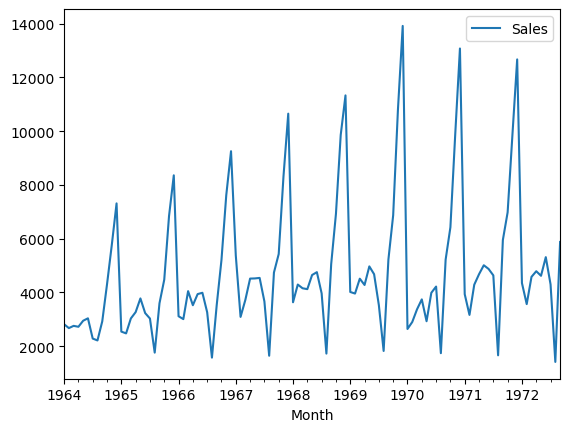

In [15]:
data.plot()

## Check the Data is Stationary or Not
if not the How can we make it stationary

In [16]:
# Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
# afuller giveives us 5 different values - ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

In [17]:
stats = adfuller(data['Sales'])

### Null Hypothesis Testin
---
H0: It is non stationary (Null Hypothesis)
H1: It is stationary (Alternative Hypothesis)

---
1. Null Hypothesis (H₀):
    The null hypothesis represents the default assumption or claim being tested. It often suggests no effect, no difference, or the status quo. For example:

        In time series: "The series is non-stationary."
        In experiments: "There is no difference in means between two groups."

2. Alternative Hypothesis (H₁):
    The alternative hypothesis is the claim that contradicts the null hypothesis. It represents the presence of an effect, difference, or change. For example:

        In time series: "The series is stationary."
        In experiments: "There is a difference in means between two groups."

---
#### Reject H₀:
    You reject the null hypothesis when the test results provide sufficient evidence against it. This usually happens when the p-value of the test is less than the chosen significance level (α), such as 0.05.

        Example: If the p-value in an ADF test is below 0.05, you reject H₀ and conclude that the series is stationary.

#### Fail to Reject H₀ (Do Not Reject H₀):
    You fail to reject the null hypothesis when the test results do not provide enough evidence against it. This happens when the p-value is greater than α.

        Example: If the p-value in an ADF test is above 0.05, you fail to reject H₀ and conclude that there isn’t enough evidence to prove stationarity (the series remains non-stationary).

In [18]:
# Ho: It is non stationary
# H1: It is stationary
# p-value > 0.05: Accept Ho (non-stationary)
# p-value <= 0.05: Reject Ho (stationary)

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
adfuller_test(data['Sales'])

ADF Test Statistic : -1.833593056327623
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [20]:
data['Sales First Difference'] = data['Sales'] - data['Sales'].shift(1)

In [21]:
# Since we have shifted the data by 1, the first value will be NaN
data.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [22]:
# now since data is seasonal and based on months we will shift the data by 12
data['Seasonal First Difference'] = data['Sales'] - data['Sales'].shift(12)

In [23]:
data.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [24]:
# again take the adfuller test
adfuller_test(data['Seasonal First Difference'].dropna()) # dropna is used to remove the NaN value

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

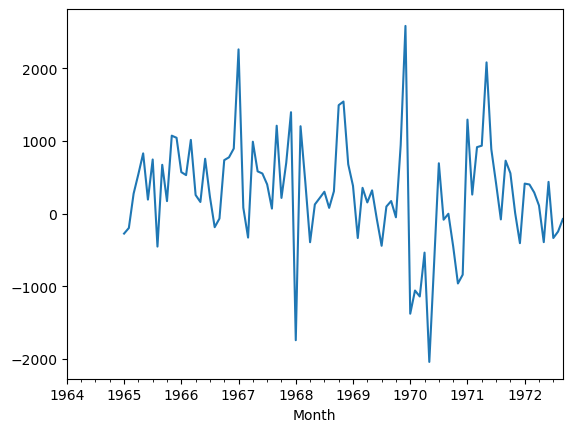

In [25]:
data['Seasonal First Difference'].plot()

## Auto Regressive Models
---
How many lags we have to use for that we use autocorrelation plot

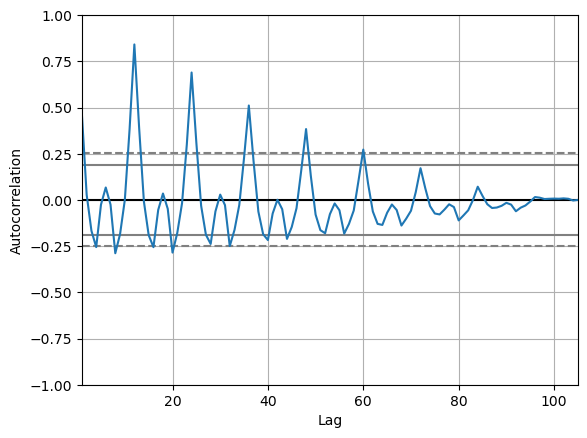

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation
* Identification of an AR model is often best done with the PACF.

    * For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
* Identification of an MA model is often best done with the ACF rather than the PACF. p,d,q

    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p AR model lags d differencing q MA lags

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

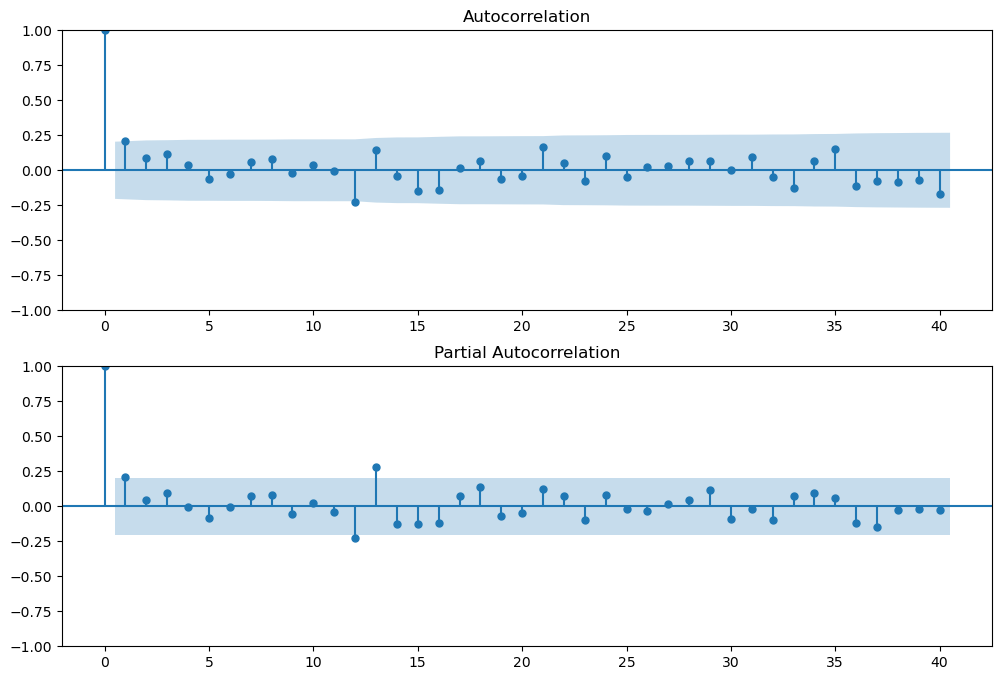

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)


In [35]:
# For non-seasonal data
# p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [36]:
model = ARIMA(data['Sales'], order=(1,1,1))
model_fit = model.fit()

c:\Users\HP\anaconda3\envs\conda_myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\envs\conda_myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\envs\conda_myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 17 Jan 2025   AIC                           1911.627
Time:                        02:25:32   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forcast it

<Axes: xlabel='Month'>

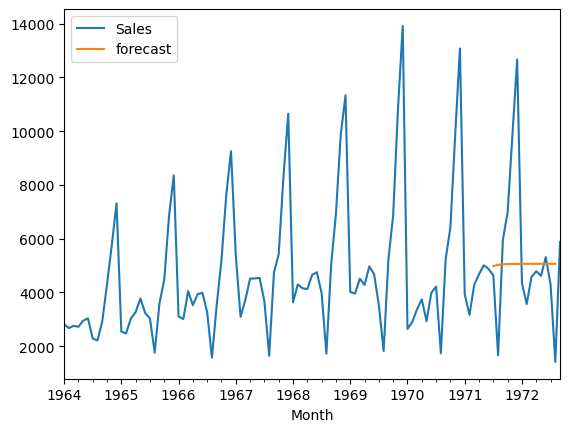

In [38]:
data['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
data[['Sales', 'forecast']].plot()

In [39]:
import statsmodels.api as sm

In [43]:
model = sm.tsa.statespace.SARIMAX(data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

c:\Users\HP\anaconda3\envs\conda_myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\envs\conda_myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

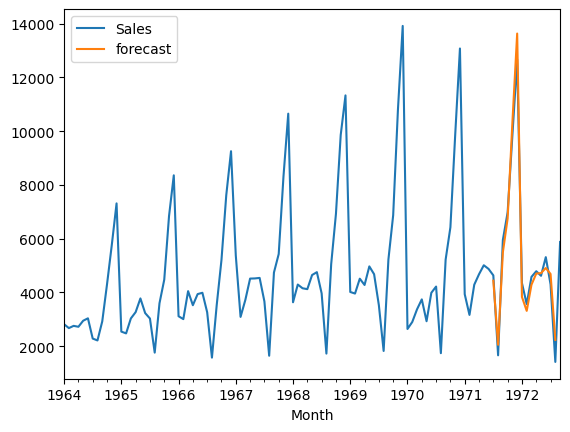

In [44]:
data['forecast'] = results.predict(start=90, end=103, dynamic=True)
data[['Sales', 'forecast']].plot()

### Forcast the Data for next 24 months

In [45]:
from pandas.tseries.offsets import DateOffset
future_dates = [data.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [46]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=data.columns)

In [48]:
future_dates_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [49]:
future_df = pd.concat([data, future_dates_df])

C:\Users\HP\AppData\Local\Temp\ipykernel_46832\2591377.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([data, future_dates_df])


<Axes: >

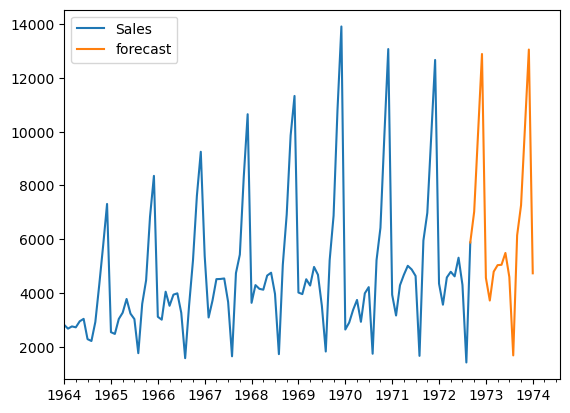

In [50]:
future_df['forecast'] = results.predict(start=104, end=120, dynamic=True)
future_df[['Sales', 'forecast']].plot()